In [15]:
import numpy as np
from dipy.io.image import save_nifti, load_nifti
import torchio as tio
import torch
import torchio.transforms as transforms
import matplotlib.pyplot as plt

def show_img(img):
    #cv2.imwrite(img_path, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
    #print(img.shape)
    img = np.squeeze(img)
    plt.figure(dpi=150)
    plt.imshow(img, cmap='gray')
#    plt.colorbar()
    plt.show()

raw_data = np.load('2. RandomGhosting\BCP_G_clean.npy')
print('Loaded data of size:', raw_data.shape)

noisy_data = np.load('1. RandomNoise\BCP_G_noisy.npy')
print('Loaded data of size:', raw_data.shape)

artifact_data = np.load('2. RandomGhosting\BCP_G_artifact.npy')
print('Loaded data of size:', artifact_data.shape)

artifact_noisy_data = np.load('BCP_G_A_N.npy')
print('Loaded data of size:', artifact_data.shape)

# xx = 150
# yy = 120
# zz = 130
# show_img(np.concatenate((raw_data[xx,:,:].squeeze(), artifact_data[xx,:,:].squeeze()),1))
# show_img(np.concatenate((raw_data[:,zz,:].squeeze(), artifact_data[:,zz,:].squeeze()),1))
# show_img(np.concatenate((raw_data[:,:,yy].squeeze(), artifact_data[:,:,yy].squeeze()),1))

Loaded data of size: (300, 320, 208)
Loaded data of size: (300, 320, 208)
Loaded data of size: (300, 320, 208)
Loaded data of size: (300, 320, 208)


In [2]:
max_value = np.max(artifact_data)
print("Max:", max_value)

min_value = np.min(artifact_data)
print("Min:", min_value)

mean_value = np.mean(artifact_data)
print("Mean:", mean_value)

std_value = np.std(artifact_data)
print("Std:", std_value)

Max: 603.4219
Min: -5.7456093
Mean: 26.308317
Std: 42.380642


In [5]:
tmp_expanded = np.expand_dims(artifact_data, axis=0)
print(tmp_expanded.shape)

# numpy 배열을 ScalarImage로 변환
scalar_image = tio.ScalarImage(tensor=tmp_expanded)

# Subject 객체에 ScalarImage 추가
artifact_subject = tio.Subject(image=scalar_image)

noise_transform = transforms.RandomNoise(mean=mean_value, std=(0, std_value*0.4))

transformed_subject = noise_transform(artifact_subject)

artifact_noisy_data = transformed_subject.image.data.numpy()

print(artifact_noisy_data.shape)

a_n_max_value = np.max(artifact_noisy_data)
print("N_Max:", a_n_max_value)

a_n_min_value = np.min(artifact_noisy_data)
print("N_Min:", a_n_min_value)

a_n_mean_value = np.mean(artifact_noisy_data)
print("N_Mean:", a_n_mean_value)

a_n_std_value = np.std(artifact_noisy_data)
print("N_Std:", a_n_std_value)

(1, 300, 320, 208)
(1, 300, 320, 208)
N_Max: 591.5841
N_Min: -82.315
N_Mean: 2.0819466
N_Std: 43.958214


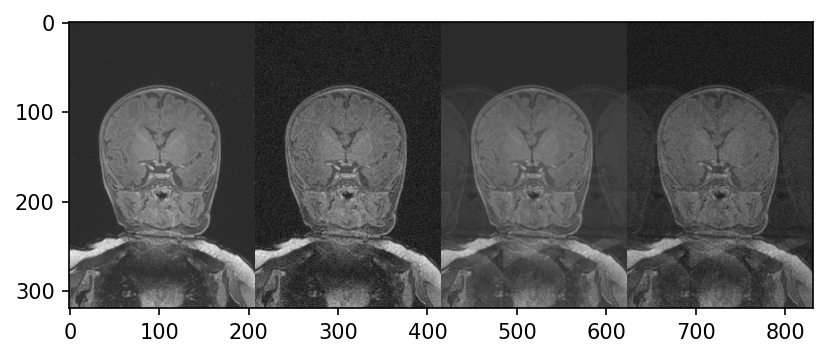

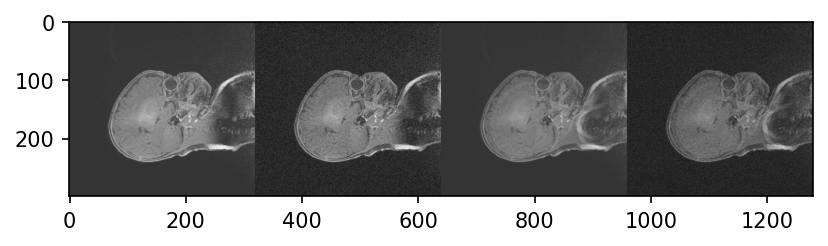

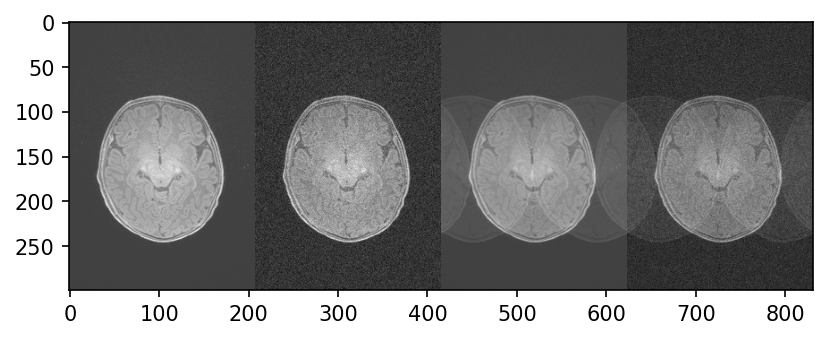

In [16]:
xx = 150
yy = 80
zz = 150
show_img(np.concatenate((raw_data[xx,:,:].squeeze(), noisy_data[xx,:,:].squeeze(), artifact_data[xx,:,:].squeeze(), artifact_noisy_data[xx,:,:].squeeze()),1))
show_img(np.concatenate((raw_data[:,:,yy].squeeze(), noisy_data[:,:,yy].squeeze(), artifact_data[:,:,yy].squeeze(), artifact_noisy_data[:,:,yy].squeeze()),1))
show_img(np.concatenate((raw_data[:,zz,:].squeeze(), noisy_data[:,zz,:].squeeze(), artifact_data[:,zz,:].squeeze(), artifact_noisy_data[:,zz,:].squeeze()),1))

In [14]:
np.save('BCP_G_A_N.npy', artifact_noisy_data.squeeze())